<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2024/blob/main/demos/day03demob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 3 Demo: Data Wrangling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1_ua8YjT7RTrpA41YmdMOsjcZCnVV6MaE'
df = pd.read_csv(url)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
df['type'].unique()

array(['C', 'H'], dtype=object)

In [ ]:
mask = df['type'] == 'H'
df[mask]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:
# what if we wanted to find the range of values of
# calories, protein, and fat?
# df.describe()
df[['calories', 'protein', 'fat']].max() - df[['calories', 'protein', 'fat']].min()

calories    110
protein       5
fat           5
dtype: int64

Text(0.5, 1.0, 'Histogram of Calories')

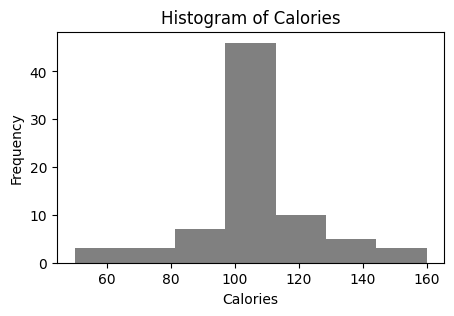

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(df['calories'], bins=7, color='gray')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Histogram of Calories')


In [ ]:
# First the column to group by
# then the column to apply the aggregation to
# then the aggregation function
df.groupby('mfr')['sugars'].mean()


mfr
A    3.000000
G    7.954545
K    7.565217
N    1.833333
P    8.777778
Q    5.250000
R    6.125000
Name: sugars, dtype: float64

In [ ]:
# Which 3 cereal manufacturers make the most cereals?


In [ ]:
df.groupby('mfr')['name'].count().sort_values(ascending=False).iloc[:3]

mfr
K    23
G    22
P     9
Name: name, dtype: int64

<Axes: >

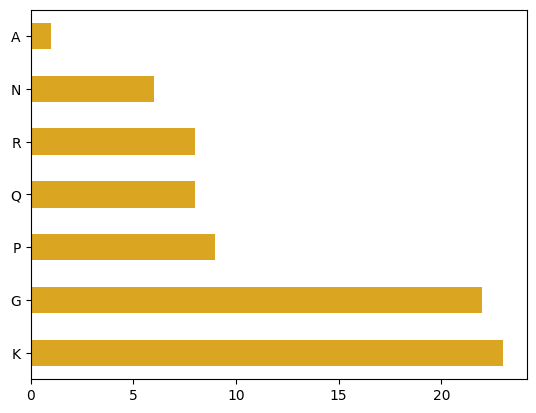

In [ ]:
df['mfr'].value_counts().plot(kind='barh', color='goldenrod')

In [ ]:
# index: groups for the rows
# columns: groups for the columns
# values: numbers to be aggregated
# aggfunc: which aggregation function (mean, count, max, etc.)

df.pivot_table(index='mfr', columns='shelf', values='sugars', aggfunc='mean', fill_value=0)



shelf,1,2,3
mfr,,,
A,0.000000,3.000000,0.000000
G,6.333333,10.142857,7.333333
K,4.750000,11.714286,6.083333
N,0.000000,2.500000,6.000000
P,13.000000,12.000000,6.833333
Q,-1.000000,9.666667,3.500000
R,3.500000,0.000000,8.750000


In [ ]:
# how could we count the hot and cold cereals for each manufacturer?
df.pivot_table(index='mfr', columns='type', values='sugars', aggfunc='count', fill_value=0)


type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,5,1
P,9,0
Q,7,1
R,8,0


In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
